# **CS412 - Machine Learning - Fall 2023**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for Homework 1.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [123]:
penguin_data = pd.read_csv("cs412_hw1_dataset.csv")

## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [124]:
# i) Find the shape of the dataset
print("Shape of the dataset (number of samples & number of attributes):", penguin_data.shape)

# ii) Display variable names (both dependent and independent)
print("\nVariable names:")
print("Independent variables:", *[col for col in penguin_data.columns if col != "health_metrics"])  # All columns except the last one (dependent variable)
print("Dependent variable:", penguin_data.columns[9])

# iii) Display the summary of the dataset
print("\nSummary of the dataset:")
penguin_data.info()

# iv) Display the first 5 rows from the training dataset
print("\nFirst 5 rows from the training dataset:")
print(penguin_data.head())

Shape of the dataset (number of samples & number of attributes): (3430, 11)

Variable names:
Independent variables: species island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g sex diet life_stage year
Dependent variable: health_metrics

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   fl

In [125]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

species_map = {'Adelie': 1, # Manually added this map
               'Chinstrap': 2,
               'Gentoo': 3}

# Check for missing values
missing_values = penguin_data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Fill missing values with the most common value in each column
penguin_data = penguin_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

penguin_data['sex'] = penguin_data['sex'].map(sex_map)
penguin_data['island'] = penguin_data['island'].map(island_map)
penguin_data['diet'] = penguin_data['diet'].map(diet_map)
penguin_data['life_stage'] = penguin_data['life_stage'].map(life_stage_map)
penguin_data['health_metrics'] = penguin_data['health_metrics'].map(health_metrics_map)
penguin_data['species'] = penguin_data['species'].map(species_map) # Manually mapped this column


Columns with missing values:
species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
year                  43
dtype: int64


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [126]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# i) Shuffle the dataset
penguin_data_shuffled = shuffle(penguin_data, random_state=42)

# ii) Separate the dependent variable and independent variables
X = penguin_data_shuffled.drop('health_metrics', axis=1)  # Independent variables
y = penguin_data_shuffled['health_metrics']  # Dependent variable

# iii) Split training and test sets as 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


health_metrics    1.000000
life_stage        0.129573
diet             -0.172632
Name: health_metrics, dtype: float64


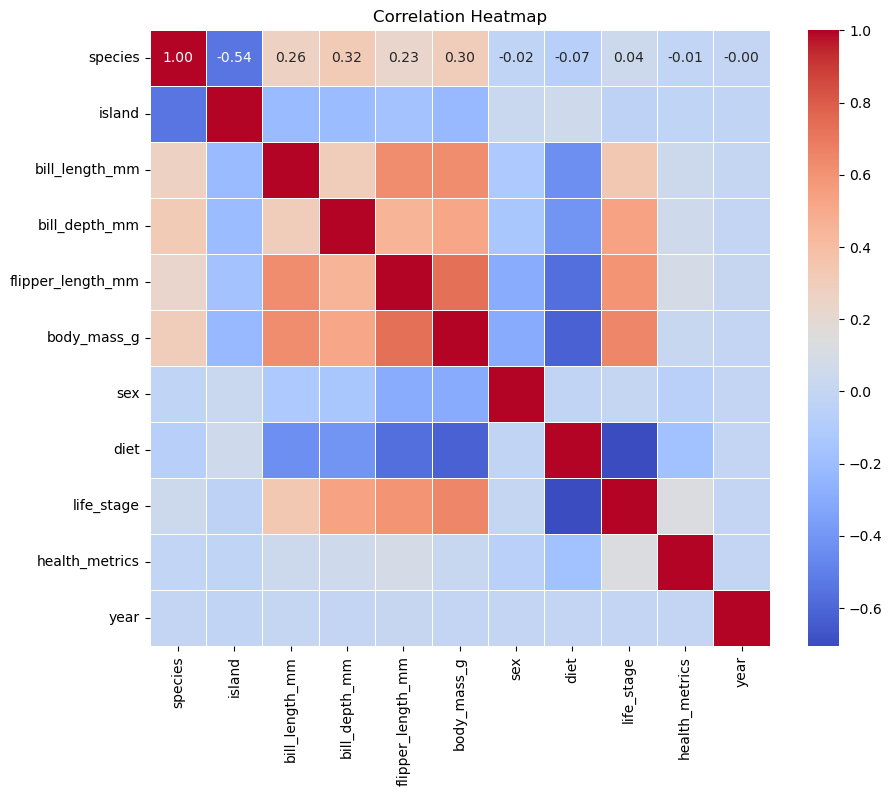

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = penguin_data.corr()

# Highlight strong correlations with the target variable
target_correlations = correlations['health_metrics'].sort_values(ascending=False)
strong_correlations = target_correlations[abs(target_correlations) > 0.1]
print(strong_correlations)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [128]:
# Display correlations with the target variable for existing features
print(correlations['health_metrics'].sort_values(ascending=False))

# Hypothetical Feature 1: Body Mass to Flipper Length Ratio
penguin_data['body_mass_flipper_ratio'] = penguin_data['body_mass_g'] / penguin_data['flipper_length_mm']

# Hypothetical Feature 2: Bill Length to Flipper Length Ratio
penguin_data['bill_to_flipper_ratio'] = penguin_data['bill_length_mm'] / penguin_data['flipper_length_mm']

# Calculate correlations with the target variable
correlations_hypothetical = penguin_data[['health_metrics', 'body_mass_flipper_ratio', 'bill_to_flipper_ratio']].corr()

# Display correlations with the target variable for hypothetical features
print("Correlations with 'health_metrics' for Hypothetical Features:")
print(correlations_hypothetical['health_metrics'])


health_metrics       1.000000
life_stage           0.129573
flipper_length_mm    0.091418
bill_depth_mm        0.056337
bill_length_mm       0.040724
body_mass_g          0.019546
year                -0.000750
species             -0.006497
island              -0.022867
sex                 -0.053031
diet                -0.172632
Name: health_metrics, dtype: float64
Correlations with 'health_metrics' for Hypothetical Features:
health_metrics             1.000000
body_mass_flipper_ratio   -0.047163
bill_to_flipper_ratio      0.004043
Name: health_metrics, dtype: float64


**You can write your answers to (4.1) here.**
----
Based on the correlations listed above, diet, life_stage, and flipper_length_mm seem like good predictors for health_metrics. Even the highest correlation coefficient (except that of the trivial health_metrics) is 0.17, which is generally considered to signify a weak correlation. I chose these three because they are all at least higher than or slightly below 0.1, standing out among all the values, as the remaining values are all significantly under this cut-off.

Two hypothetical features that could help with predicting health_metrics can be body mass to flipper length ratio and bill length to flipper length ratio. I am proposing these two because they intuitively make sense: they may somehow reveal physical adaptations that the penguins developed over evolutionary time. These two features could be derived as in the code section above: body_mass_g / flipper_length_mm and bill_length_mm / flipper_length_mm respectively.

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 50],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 10}


**Add explanation here:** I chose max_depth and min_samples_split as the hyperparameters to tune. max_depth will allow me to find the right balance between capturing important patterns and avoiding overfitting. On the other hand, min_samples_split will help me determine how sensitive the tree is to small variations in data.

Best hyperparameters appear to be max_depth = 15 and min_samples_split = 10.

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [130]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Retrain the model with specified hyperparameters
final_dt_model = DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)
final_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42)

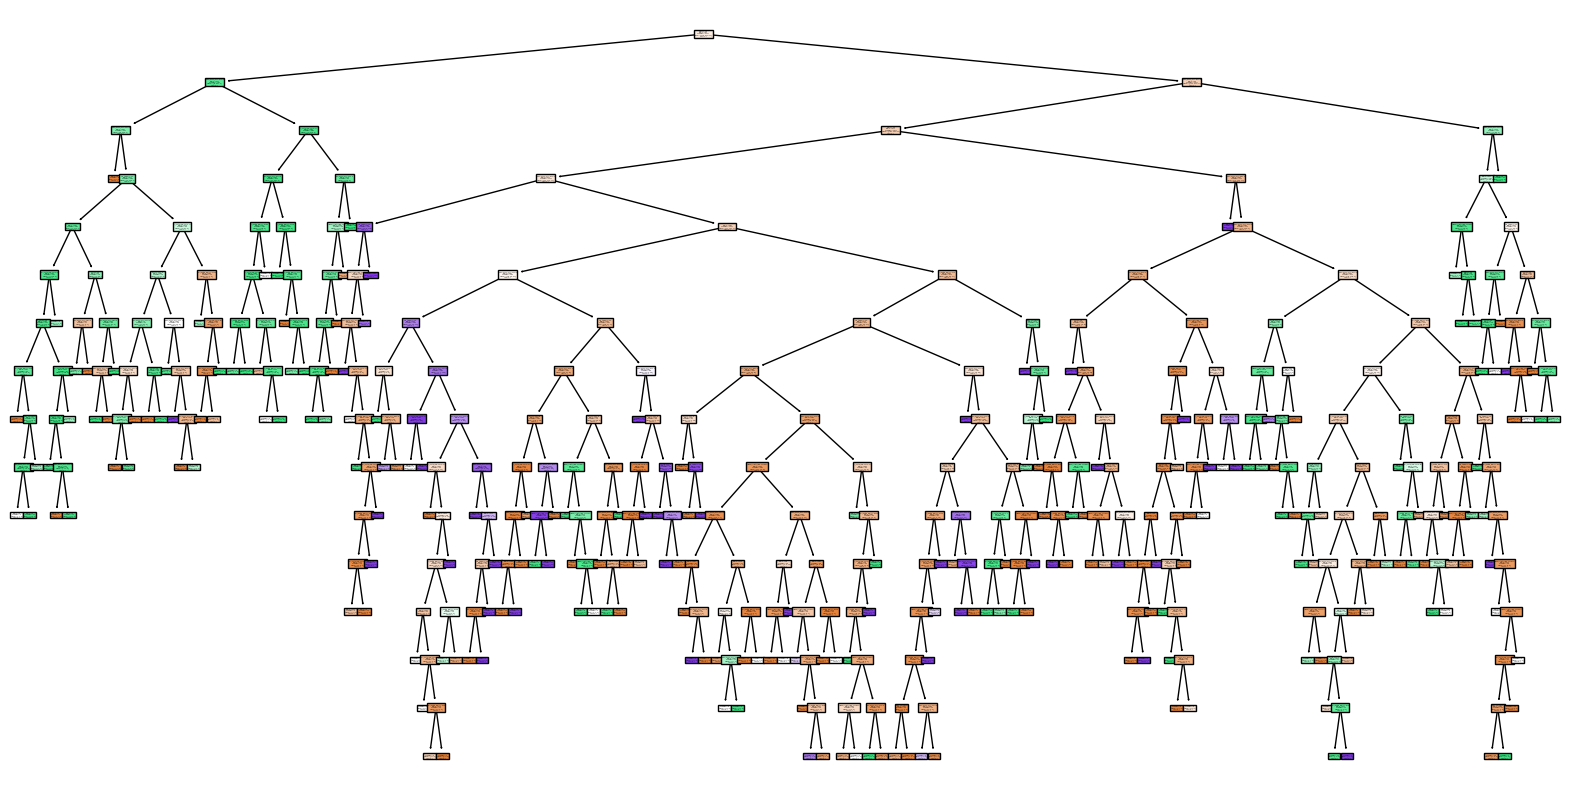

In [131]:
from sklearn.tree import plot_tree

# Convert class labels to strings
class_names_str = [str(class_label) for class_label in final_dt_model.classes_]

# Plot the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_dt_model, filled=True, feature_names=X.columns, class_names=class_names_str)
plt.show()

## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [132]:
from sklearn.metrics import accuracy_score

# Predict labels for testing data
y_pred = final_dt_model.predict(X_test)

# Display the predicted labels
print("Predicted Labels for Testing Data:")
print(y_pred)

# Assuming y_test contains the true labels for the testing data
# If you have a different variable for true labels, replace y_test accordingly

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Classification Accuracy: {accuracy:.4f}")


Predicted Labels for Testing Data:
[1 1 2 1 1 1 2 2 3 1 2 2 2 1 1 1 2 2 3 2 1 2 1 1 3 2 2 1 3 1 3 3 2 1 2 1 2
 1 2 2 2 1 1 1 1 1 1 1 3 1 2 1 1 3 2 1 2 2 2 1 2 3 2 2 1 1 2 1 2 2 1 3 1 3
 2 1 3 3 3 1 1 1 2 1 2 3 1 2 3 1 3 1 1 2 1 1 2 1 2 2 1 1 3 2 3 1 1 1 3 1 2
 2 1 2 3 2 2 1 2 1 1 1 1 2 1 2 3 2 1 3 3 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2 2 1
 2 1 3 1 1 1 2 1 1 2 3 1 2 1 2 1 2 3 3 2 2 1 1 2 3 1 1 3 1 1 1 2 1 2 1 2 3
 2 2 1 1 3 2 1 2 1 2 2 1 1 1 3 1 2 3 1 1 2 2 1 2 3 1 1 1 3 1 2 1 1 1 2 2 1
 1 1 3 1 1 1 2 1 2 1 1 3 1 3 1 3 2 3 3 1 2 1 2 1 1 3 1 1 1 2 3 1 2 2 2 2 2
 3 3 1 1 1 1 1 1 2 3 1 1 2 1 2 3 1 1 3 1 1 3 3 1 1 1 3 2 1 3 2 2 1 2 1 2 1
 1 1 1 1 2 1 2 2 1 3 1 3 2 1 3 2 2 1 2 2 1 3 2 3 1 3 2 3 2 3 1 1 1 2 2 1 2
 3 1 3 1 1 2 1 1 2 3 3 1 3 1 1 1 1 2 2 1 1 2 1 1 2 2 1 2 1 2 3 1 1 3 1 1 1
 1 1 2 1 3 1 1 1 1 1 1 2 2 2 3 2 1 1 1 2 1 2 2 1 2 2 1 1 2 3 2 1 2 1 1 2 1
 1 1 1 3 3 2 1 1 1 3 1 2 1 3 2 2 1 1 2 2 2 1 1 1 3 2 1 1 1 2 3 1 3 1 3 1 2
 1 2 2 1 1 3 2 1 2 2 1 2 1 1 1 1 3 1 1 3 2 1 3 3 2 1 1 3 3 2 2 1 

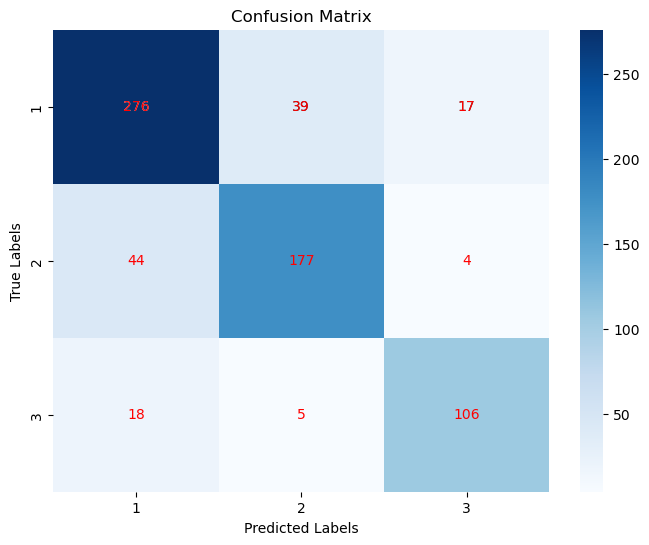

In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=final_dt_model.classes_, yticklabels=final_dt_model.classes_)

# Add labels to each square
for i in range(len(final_dt_model.classes_)):
    for j in range(len(final_dt_model.classes_)):
        plt.text(j + 0.5, i + 0.5, conf_matrix[i, j], color='red', ha='center', va='center')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Fill the blanks:** The model most frequently mistakes class(es) _____2____ for class(es) ____1_____.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
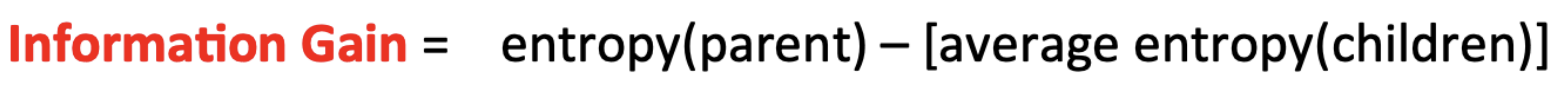



In [134]:
from sklearn.tree import _tree
import numpy as np

# Extract the tree from the model
tree_ = final_dt_model.tree_

# Function to calculate entropy
def calculate_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Function to calculate information gain
def calculate_information_gain(parent_labels, child_labels):
    parent_entropy = calculate_entropy(parent_labels)
    average_child_entropy = np.sum([len(child) / len(parent_labels) * calculate_entropy(child) for child in child_labels])
    information_gain = parent_entropy - average_child_entropy
    return information_gain

# Function to get the indices of instances in each node
def get_node_indices(node):
    if tree_.children_left[node] == tree_.children_right[node]:  # Leaf node
        return [node]
    else:
        left_child_indices = get_node_indices(tree_.children_left[node])
        right_child_indices = get_node_indices(tree_.children_right[node])
        return left_child_indices + right_child_indices

# Get the indices of instances in the left and right child nodes
left_child_indices = get_node_indices(1)  # Assuming binary split at the root
right_child_indices = get_node_indices(2)

# Get the labels for each node
parent_labels = y_train
left_child_labels = y_train.iloc[left_child_indices]
right_child_labels = y_train.iloc[right_child_indices]

# Calculate information gain
information_gain = calculate_information_gain(parent_labels, [left_child_labels, right_child_labels])

print(f"Information Gain on the first split with Entropy: {information_gain:.4f}")

Information Gain on the first split with Entropy: 1.4856



## 9) GPT 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

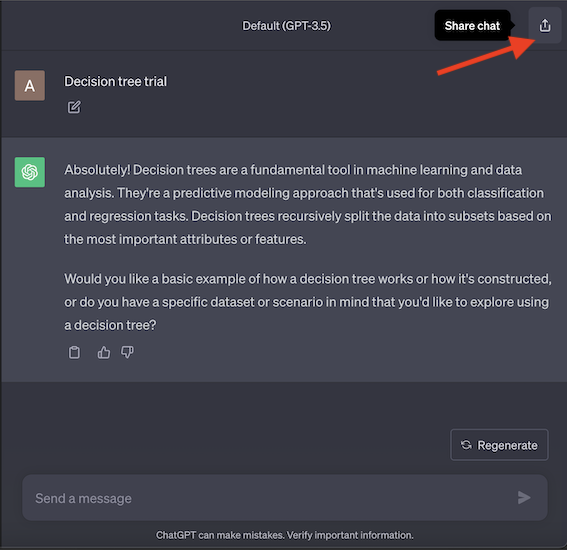

- On the screen that opens up, name the chat Name-Surname-CS412-HW1 (Shown Below).

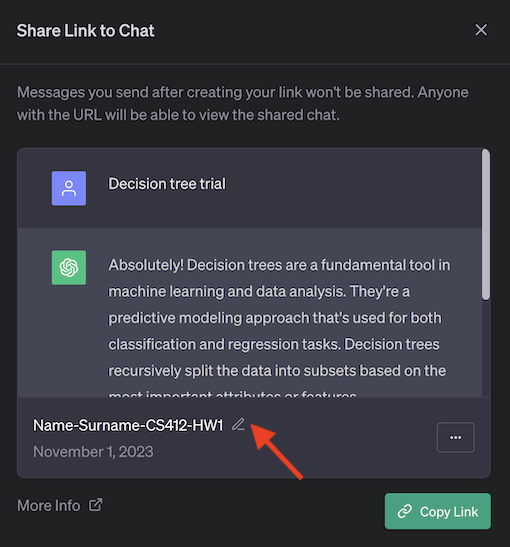

- Set sharing to "Share your name" (Shown Below).

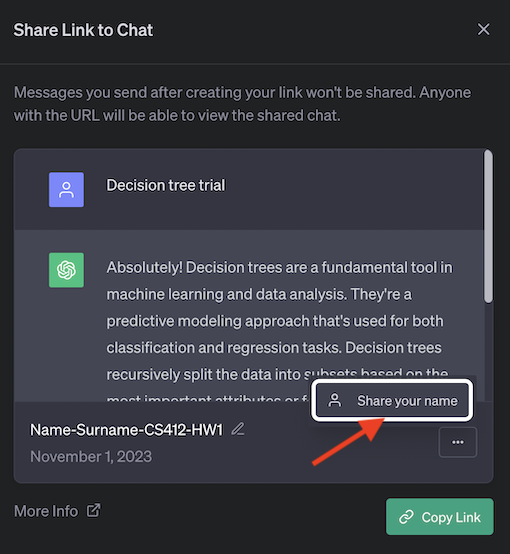

- Copy link and paste to the text cell below (Shown Below).

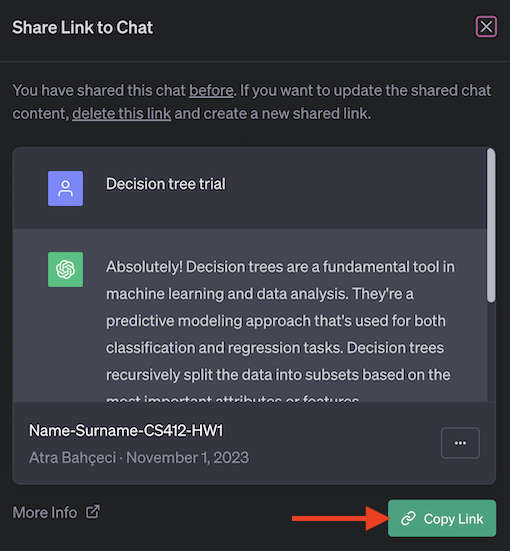

**Link to Chat:** https://chat.openai.com/share/58bee29c-a749-463e-8d56-c4edf0815b3f